In [17]:
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as plt
import scikits.umfpack
from scipy.sparse.linalg import eigs, LinearOperator
%matplotlib inline

In [18]:
with open('matrix_40_90.txt', 'r') as f:
    n = int(f.readline())
    data = f.readlines()
    data = [x.rstrip().split() for x in data]
    ia = []
    k = 0
    while len(ia) < n+1:
        ia += data[k]
        k += 1
    ia = [int(x)-1 for x in ia]
    nnz = ia[-1]
    ja = []    
    while len(ja) < nnz:
        ja += data[k]
        k += 1
    ja = [int(x)-1 for x in ja]
    a = []    
    while len(a) < nnz:
        a += data[k]
        k += 1
    a = [float(x) for x in a]

In [19]:
A = sps.csr_matrix((a, ja, ia))

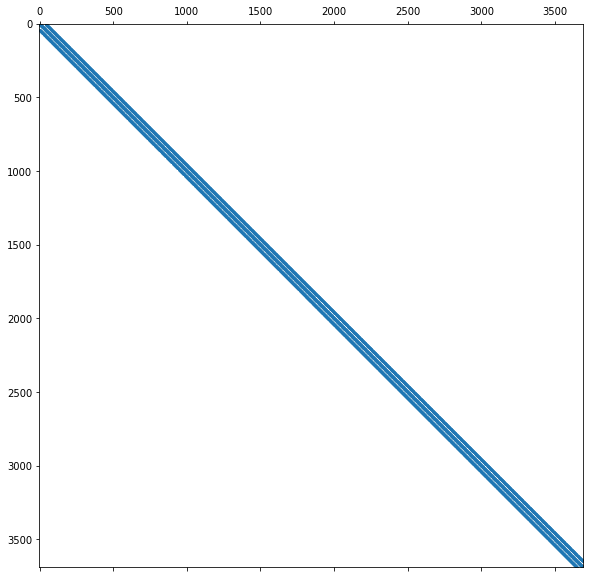

In [20]:
plt.figure(figsize=(10, 10))
plt.spy(A, markersize=1)

In [21]:
nnz / n

6.738211382113821

In [22]:
class OpInv(LinearOperator):
    """
    Solve (A - sigma I) x = f
    """
    def __init__(self, A, sigma):
        As = A - sigma * sps.eye(A.shape[0])
        
        self.LU = scikits.umfpack.splu(As)
        
        self.shape = A.shape
        self.dtype = A.dtype
        
    def _matvec(self, w):
        return self.LU.solve(w)

In [25]:
eigs(A, k=10, which='LM', return_eigenvectors=False)

array([269.03471065+0.j, 269.03471065+0.j, 269.03471065+0.j,
       269.03471065+0.j, 269.03471065+0.j, 269.03471065+0.j,
       269.03471065+0.j, 269.03471065+0.j, 269.03471065+0.j,
       269.03471065+0.j])

In [26]:
sigma = 0
Op = OpInv(A, sigma)
eigs(A, k=10, sigma=sigma, which='LM', return_eigenvectors=False, OPinv=Op)

array([1.0002537 +0.j, 1.00023917+0.j, 1.00021747+0.j, 1.00021747+0.j,
       1.00019731+0.j, 1.00017708+0.j, 1.0001496 +0.j, 1.00011271+0.j,
       1.00005803+0.j, 1.00002055+0.j])

In [27]:
Afull = A.todense()

In [28]:
vals = np.linalg.eigvals(Afull)

(0, 20)

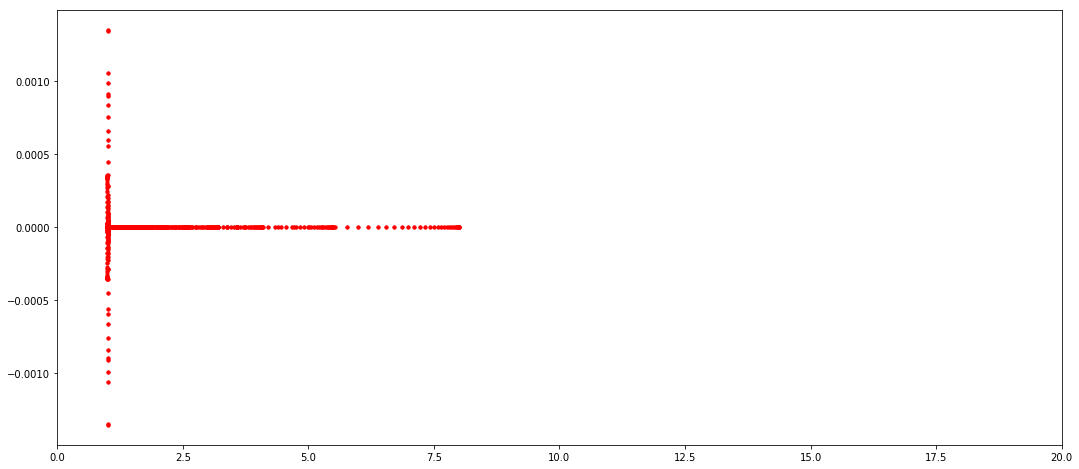

In [32]:
plt.figure(figsize=(18, 8))
plt.plot(np.real(vals), np.imag(vals), 'r.')
plt.xlim(0, 20)

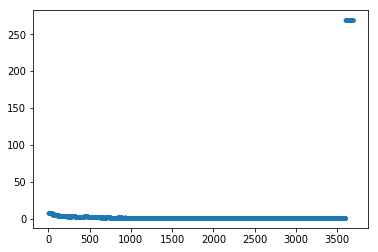

In [30]:
plt.plot(np.real(vals), '.')